## todo
    isolate code to py modules
    missing values inferred instead of imputed
    evaluate variables (type and amount of unique values)
    class balance with oversampling or undersampling

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [85]:
df = pd.read_csv('MetOData.csv')
#remove first column from csv since it is only the index
df = df.iloc[:,1:]
df.head()

,ACC,PDB,Met,Oxidable,Yd.chain,Fd.chain,Wd.chain,nY.chain,nF.chain,nW.chain,...,CT_M,CT_N,CT_P,CT_Q,CT_R,CT_S,CT_T,CT_V,CT_W,CT_Y
0,A5YKK6,4C0D,1883,No,10.6,4.8,8.6,0,2,0,...,22.0,37.0,38.0,2.0,14.0,27.0,8.0,24.0,155.0,28.0
1,A5YKK6,4C0D,1905,No,10.9,8.8,12.6,0,0,0,...,22.0,15.0,16.0,9.0,7.0,5.0,21.0,2.0,133.0,6.0
2,A5YKK6,4C0D,1996,No,8.3,11.6,14.2,0,0,0,...,55.0,6.0,8.0,18.0,31.0,47.0,14.0,11.0,42.0,40.0
3,A5YKK6,4C0D,2051,No,6.8,4.8,9.2,1,1,0,...,12.0,30.0,5.0,6.0,29.0,83.0,4.0,31.0,10.0,13.0
4,A5YKK6,4C0D,2063,No,9.8,5.8,10.5,0,1,0,...,25.0,18.0,14.0,3.0,17.0,71.0,22.0,19.0,257.0,1.0


## Extract features (x) and label (y) from original csv

In [86]:
x = df.iloc[:,4:]
x.head()

,Yd.chain,Fd.chain,Wd.chain,nY.chain,nF.chain,nW.chain,numberBonds.chain,closestAro.chain,Yd.pdb,Fd.pdb,...,CT_M,CT_N,CT_P,CT_Q,CT_R,CT_S,CT_T,CT_V,CT_W,CT_Y
0,10.6,4.8,8.6,0,2,0,2,4.8,10.6,4.8,...,22.0,37.0,38.0,2.0,14.0,27.0,8.0,24.0,155.0,28.0
1,10.9,8.8,12.6,0,0,0,0,8.8,10.9,8.8,...,22.0,15.0,16.0,9.0,7.0,5.0,21.0,2.0,133.0,6.0
2,8.3,11.6,14.2,0,0,0,0,8.3,8.3,11.6,...,55.0,6.0,8.0,18.0,31.0,47.0,14.0,11.0,42.0,40.0
3,6.8,4.8,9.2,1,1,0,2,4.8,6.8,4.8,...,12.0,30.0,5.0,6.0,29.0,83.0,4.0,31.0,10.0,13.0
4,9.8,5.8,10.5,0,1,0,1,5.8,9.8,5.8,...,25.0,18.0,14.0,3.0,17.0,71.0,22.0,19.0,257.0,1.0


In [87]:
y = df['Oxidable'].apply(lambda x: x == 'Yes')
y.head()

0    False
1    False
2    False
3    False
4    False
Name: Oxidable, dtype: bool

## Evaluate missing values

dpx             265
fM              237
entropy         237
mean.entropy    237
sd.entropy      237
dtype: int64


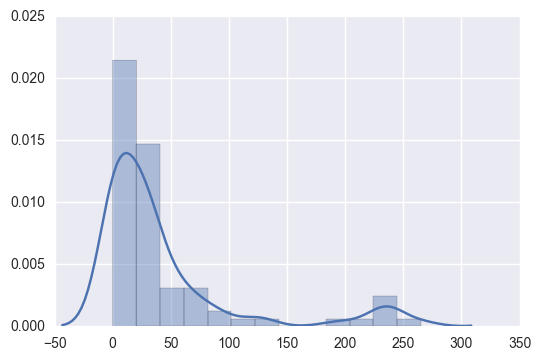

In [88]:
missing = (df.isnull().sum()).sort_values(ascending=False)
print missing.head()
sns.distplot(missing)


## Run CV experiments with multiple metrics

In [89]:
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
import scipy



classifier = Pipeline([
        ('imputer', Imputer(strategy='mean')),
        ('rf', RandomForestClassifier(n_estimators=1000, class_weight='balanced'))
    ])

from sklearn.metrics import matthews_corrcoef, make_scorer

scoring = {
    'accuracy': 'accuracy',
#     'precision_macro': 'precision_macro',
#     'recall_macro': 'recall_macro',
#     'f1':'f1',
    'f1_macro':'f1_macro',
    'f1_micro':'f1_micro',
    'mcc':make_scorer(matthews_corrcoef)
}

cv_results = cross_validate(classifier, x, y, cv=5, scoring=scoring, verbose=10, return_train_score=False )
pd.DataFrame(cv_results)

# print np.mean(scores), scipy.stats.norm.interval(0.95, loc=np.mean(scores), scale=np.std(scores))


[CV]  ................................................................
[CV]  , f1_macro=0.465940054496, mcc=0.0, f1_micro=0.872448979592, accuracy=0.872448979592, total=   4.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


[CV]  , f1_macro=0.46301369863, mcc=-0.0388227309345, f1_micro=0.862244897959, accuracy=0.862244897959, total=   5.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.2s remaining:    0.0s


[CV]  , f1_macro=0.467213114754, mcc=0.0, f1_micro=0.876923076923, accuracy=0.876923076923, total=   4.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.7s remaining:    0.0s


[CV]  , f1_macro=0.465564738292, mcc=-0.0270459664935, f1_micro=0.871134020619, accuracy=0.871134020619, total=   4.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   19.2s remaining:    0.0s


[CV]  , f1_macro=0.467032967033, mcc=0.0, f1_micro=0.876288659794, accuracy=0.876288659794, total=   4.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   24.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   24.2s finished


,fit_time,score_time,test_accuracy,test_f1_macro,test_f1_micro,test_mcc
0,4.568,0.403,0.872449,0.465940,0.872449,0.000000
1,5.020,0.307,0.862245,0.463014,0.862245,-0.038823
2,4.139,0.297,0.876923,0.467213,0.876923,0.000000
3,4.265,0.331,0.871134,0.465565,0.871134,-0.027046
4,4.533,0.425,0.876289,0.467033,0.876289,0.000000


## Study performance (ROC curve and associated metrics)

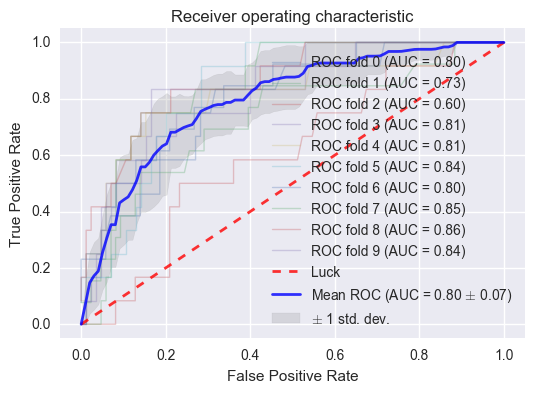

In [90]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp

cv = StratifiedKFold(n_splits=10)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

importances = []

i = 0
for train, test in cv.split(x, y):
    probas_ = classifier.fit(x.iloc[train], y.iloc[train]).predict_proba(x.iloc[test])
    importances.append(classifier.steps[1][1].feature_importances_)
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))   
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Study feature importance

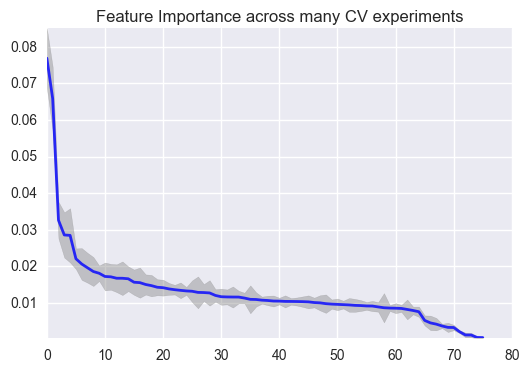

                     max95      mean     min95
SASA.pdb          0.085098  0.076915  0.068732
SASA.chain        0.074565  0.065910  0.057256
CT_Y              0.037646  0.032629  0.027611
NT_M              0.034766  0.028590  0.022415
Met2Y             0.035887  0.028480  0.021072
NT_W              0.024904  0.022089  0.019274
closestAro.pdb    0.024988  0.020649  0.016311
closestAro.chain  0.023685  0.019612  0.015539
Fd.pdb            0.022545  0.018593  0.014640
CT_H              0.020221  0.018115  0.016010
Bfactor           0.021044  0.017240  0.013436
Met2S_PTM         0.020674  0.017146  0.013619
Fd.chain          0.020547  0.016759  0.012972
Yd.chain          0.021344  0.016751  0.012159
NT_H              0.019987  0.016615  0.013244
NT_R              0.019118  0.015667  0.012216
Yd.pdb            0.019670  0.015556  0.011441
NT_K              0.017802  0.015048  0.012295
CT_I              0.017657  0.014735  0.011813
closest.ptm.pdb   0.016479  0.014293  0.012108


In [91]:
importance_mean = np.mean(importances, axis=0)
importance_ci = scipy.stats.norm.interval(0.95, loc=importance_mean, scale=np.std(importances, axis=0))
importance_df = pd.DataFrame({
        'mean':importance_mean , 
        'min95':importance_ci[0], 
        'max95':importance_ci[1]}, 
       index=x.columns,
      ).sort_values(by='mean', ascending=False)

plt.ylim([np.min(importance_df['min95']), np.max(importance_df['max95'])])
indexes = range(0,len(importance_df))
plt.plot(indexes, importance_df['mean'], color='b',
         label=r'Mean importance',
         lw=2, alpha=.8)
plt.fill_between(indexes, importance_df['min95'], importance_df['max95'], color='grey', alpha=.4,
                 label=r'$\pm$ 1 std. dev.')
plt.title('Feature Importance across many CV experiments')
plt.show()
print importance_df.head(20)

### Visualize distribution of the most important feature according to label

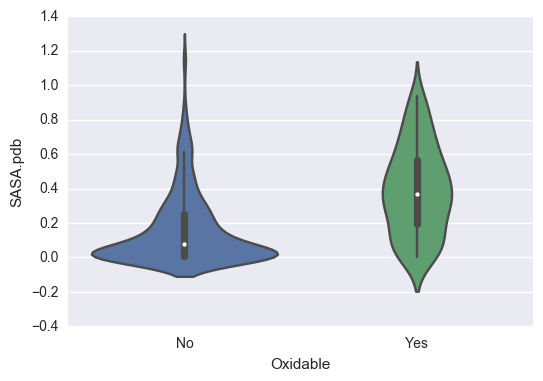

In [92]:
sns.violinplot(x=df['Oxidable'], y=df['SASA.pdb'])